In [53]:
import matplotlib.pyplot as plt
import requests
import json
import pandas as pd
import numpy as np
import matplotlib
from rich import print_json
from IPython.display import display

In [4]:
def lanceRequete (collection, req):
    reponses = requests.get("https://api.archives-ouvertes.fr/search/"+collection+"/?q="+req)
    #print_json(json.dumps(json.loads(reponses.text), indent=3))
    print_json(json.dumps(json.loads(reponses.text), indent=3))

### les champs des requêtes :
option "fq" définit les filtres (par exemple une plage)
option "facet" définit les facettes qui permettent de ventiler les réponses en groupes


# Liste des labos INS2I
LISN = LISN + LIMSI + LRI
LS2N = LS2N + LINA + IRCCyN
LIS = LIS + LSIS + LIF


In [128]:
# les id des labos sont ceux qu'ils ont ou ont eus depuis 2016, cf. https://aurehal.archives-ouvertes.fr/structure/index
listeLabosINS2I=(("CMP",{244423}), ("CRAN",{185180}), ("CREATIS",{139739}), ("CRIL",{90448}), ("CRISTAL",{410272}), ("DI ENS",{25027}), ("ETIS",{1003474,1061575}), ("GIPSA-Lab",{1043333,1042376}), ("GREYC",{150}), ("G-SCOP",{1043137,1041927}),("HEUDIASYC",{389870}), ("I3S",{13009}),("ICUBE",{217648}), ("IDRIS",{1823}), ("IRIF",{1005016,444497}), ("IRISA",{490899,105128}), ("IRIT",{34499}), ("ISIR",{541937,96164}), ("L2S",{1051117,1289}),("LAAS",{459}),("LABRI",{3102}), ("LAB-STICC",{486345}), ("LAMIH",{1067790,1303}), ("LAMSADE",{989}), ("LIG",{1043301, 1041964}),("LIGM",{1001627,3210}), ("LIMOS",{1063677,490706}),("LISN",{1061259,1041968,247329,2544,1050003}),("LIP",{35418}),("LIP6",{541703,233}),("LIPN",{1000994,994}),("LIRIS",{2003}), ("LIRMM",{181}), ("LIS",{527033,199402,199394}), ("LIX",{2071}),("LORIA",{206040}),("LS2N",{1061259,95421,21439}),("LSV",{1042689,2571}),("MDLS",{210816}),("STMS",{541779,1374}), ("TIMA",{1043043,1044023}),("TIMC IMAG",{1043049,1070489,1042061}),("VERIMAG",{1043148,1041816}))  # TODO: vérifier les IDs

In [2]:
listeLabosINS2I=(("LIRIS",{2003}), ("LIS",{527033,199402,199394}))

In [18]:
# Essai de requête
recherche="structId_i:1042376&rows=10&fq=producedDateY_i:[2016 TO 2017]&wt=json"
reponses = requests.get("https://api.archives-ouvertes.fr/search/CNRS/?q="+recherche)
j = json.loads(reponses.text)
print("Nombre documents trouvés : ",j['response']['numFound'])

Nombre documents trouvés :  1047


## Nombre total de produits de la recherche dans HAL par labo selon l'id de structure, entre 2016 et 2020 compris

(obsolète) Nombre de publications par labo selon nom de structure

In [28]:
for labo in listeLabosINS2I:
    print(labo)
    recherche= "labStructAcronym_s:"+labo[0]+"&fq=producedDateY_i:[2016 TO 2017]&rows=10&fl=label_s,keyword_s&indent=true&wt=json"
    print(recherche)
    reponses = requests.get("https://api.archives-ouvertes.fr/search/CNRS/?q="+recherche)
    j = json.loads(reponses.text)
    print("Nombre documents trouvés : ",j['response']['numFound'])
    #print(reponses.text)

('LIRIS', {2003})
labStructAcronym_s:LIRIS&fq=producedDateY_i:[2016 TO 2017]&rows=10&fl=label_s,keyword_s&indent=true&wt=json
Nombre documents trouvés :  801
('LIS', {527033, 199402, 199394})
labStructAcronym_s:LIS&fq=producedDateY_i:[2016 TO 2017]&rows=10&fl=label_s,keyword_s&indent=true&wt=json
Nombre documents trouvés :  330


In [130]:
def initStatsLabo ():
    npPublisLabo = list()
    for labo in listeLabosINS2I:
        npPublisLabo.append({"nom":labo[0]})
    #print(npPublisLabo)
    global statsLabo
    statsLabo = pd.DataFrame(npPublisLabo)
    statsLabo.set_index('nom',inplace=True)
    statsLabo["Total"]=0
    statsLabo["COMM"]=0
    statsLabo["ART"]=0
    statsLabo["THESE"]=0
    statsLabo["HDR"]=0
    statsLabo["COUV"]=0
    statsLabo["REPORT"]=0
    statsLabo["DOUV"]=0
    statsLabo["POSTER"]=0
    statsLabo["UNDEFINED"]=0
    statsLabo["OTHER"]=0
    statsLabo["LECTURE"]=0
    statsLabo["PATENT"]=0
    statsLabo["OUV"]=0
    statsLabo["SOFTWARE"]=0
    statsLabo["MEM"]=0
    statsLabo["PRESCONF"]=0
    statsLabo["SYNTHESE"]=0
    #statsLabo["REPORT_GMAST"]=0 #valeur nulle pour tous les labos
    statsLabo["OTHERREPORT"]=0
    statsLabo["VIDEO"]=0

In [119]:
# ici seul le total par labo est calculé
initStatsLabo()
for labo in listeLabosINS2I:
    print(labo)
    for id in labo[1]:
        #print (id)
        recherche= "structId_i:"+str(id)+"&fq=producedDateY_i:[2016 TO 2017]&rows=0&fl=label_s,keyword_s&indent=true&wt=json"
        reponses = requests.get("https://api.archives-ouvertes.fr/search/CNRS/?q="+recherche)
        j = json.loads(reponses.text)
        print("Nombre documents trouvés : ",j['response']['numFound'])
        statsLabo.loc[labo[0]]['Total'] += j['response']['numFound']
    #print(reponses.text)
print(statsLabo)

('LIRIS', {2003})
Nombre documents trouvés :  787
('LIS', {527033, 199402, 199394})
Nombre documents trouvés :  322
Nombre documents trouvés :  389
Nombre documents trouvés :  160
       Total  COMM  ART  THESE  COUV  REPORT  DOUV  POSTER  UNDEFINED  OTHER  \
nom                                                                            
LIRIS    787     0    0      0     0       0     0       0          0      0   
LIS      871     0    0      0     0       0     0       0          0      0   

       HDR  LECTURE  PATENT  OUV  
nom                               
LIRIS    0        0       0    0  
LIS      0        0       0    0  


In [132]:
initStatsLabo()
for labo in listeLabosINS2I:
    print(labo)
    for id in labo[1]:
        #print (id)
        recherche= "structId_i:"+str(id)+"&fq=producedDateY_i:[2016 TO 2020]&rows=0&indent=true&wt=json&facet=true&facet.pivot=docType_s"
        try:
            reponses = requests.get("https://api.archives-ouvertes.fr/search/CNRS/?q="+recherche, timeout=(300,300))
        except requests.ReadTimeout:
            print ("temps limite atteint")
        j = json.loads(reponses.text)
        #print(json.dumps(j, indent=3))
        for donnees in  j['facet_counts']['facet_pivot']['docType_s']:
            if donnees['value'] in statsLabo: #on ne conserve les stats que pour les types choisis à l'initialisation du dataframe
                statsLabo.loc[labo[0]][donnees['value']] += donnees['count']
        #print("Nombre documents trouvés : ",j['response']['numFound'])
        statsLabo.loc[labo[0]].Total += j['response']['numFound']
display(statsLabo)

('CMP', {244423})
('CRAN', {185180})
('CREATIS', {139739})
('CRIL', {90448})
('CRISTAL', {410272})
('DI ENS', {25027})
('ETIS', {1003474, 1061575})
('GIPSA-Lab', {1042376, 1043333})
('GREYC', {150})
('G-SCOP', {1043137, 1041927})
('HEUDIASYC', {389870})
('I3S', {13009})
('ICUBE', {217648})
('IDRIS', {1823})
('IRIF', {1005016, 444497})
('IRISA', {105128, 490899})
('IRIT', {34499})
('ISIR', {541937, 96164})
('L2S', {1289, 1051117})
('LAAS', {459})
('LABRI', {3102})
('LAB-STICC', {486345})
('LAMIH', {1067790, 1303})
('LAMSADE', {989})
('LIG', {1041964, 1043301})
('LIGM', {3210, 1001627})
('LIMOS', {490706, 1063677})
('LISN', {1041968, 247329, 2544, 1050003, 1061259})
('LIP', {35418})
('LIP6', {233, 541703})
('LIPN', {1000994, 994})
('LIRIS', {2003})
('LIRMM', {181})
('LIS', {527033, 199402, 199394})
('LIX', {2071})
('LORIA', {206040})
('LS2N', {1061259, 95421, 21439})
('LSV', {1042689, 2571})
('MDLS', {210816})
('STMS', {541779, 1374})
('TIMA', {1043043, 1044023})
('TIMC IMAG', {1043049, 

,Total,COMM,ART,THESE,HDR,COUV,REPORT,DOUV,POSTER,UNDEFINED,OTHER,LECTURE,PATENT,OUV,SOFTWARE,MEM,PRESCONF,SYNTHESE,OTHERREPORT,VIDEO
nom,,,,,,,,,,,,,,,,,,,,
CMP,9,5,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
CRAN,1938,950,732,107,10,52,16,25,7,16,4,0,12,7,0,0,0,0,0,0
CREATIS,1454,573,677,83,3,15,1,4,74,7,4,5,8,0,0,0,0,0,0,0
CRIL,305,220,46,7,2,8,2,8,0,5,1,0,0,4,2,0,0,0,0,0
CRISTAL,2929,1506,903,145,13,71,51,33,44,96,19,3,6,30,0,4,4,1,0,0
DI ENS,1053,526,219,109,1,14,31,13,6,113,4,1,2,7,1,3,3,0,0,0
ETIS,575,292,184,29,4,19,2,11,6,17,2,1,5,2,0,1,0,0,0,0
GIPSA-Lab,2446,1118,851,167,4,96,35,13,48,51,19,0,13,10,10,9,0,0,0,2
GREYC,882,438,268,59,8,18,6,18,21,20,7,0,4,11,4,0,0,0,0,0


In [133]:
statsLabo.to_csv("statsLaboParType.csv")

## Nombre de publications par labo et par année de production de l'article

In [154]:
statsParAnneeLabo = pd.DataFrame()
for labo in listeLabosINS2I:
    print(labo)
    anneeDebut = 2016
    anneeFin = 2020
    evolutionLabo = pd.DataFrame()
    for x in range(anneeDebut,anneeFin+1):
        data = {
            "Année" : [x],
            "Nom":labo[0],
            "Total" : [0],
            "COMM" : [0],
            "ART" : [0],
            "COUV" : [0],
            "DOUV" : [0],
            "OUV" : [0],
            "THESE" : [0],
            "HDR" : [0]
        }
        evolutionLabo = pd.concat([evolutionLabo, pd.DataFrame(data)], ignore_index=True)
    evolutionLabo.set_index(['Année'], inplace=True)
    for id in labo[1]:
        #print (id)
        recherche= "structId_i:"+str(id)+"&fq=producedDateY_i:[2016 TO 2020]&rows=0&indent=true&wt=json&facet=true&facet.pivot=producedDateY_i,docType_s"
        try:
            reponses = requests.get("https://api.archives-ouvertes.fr/search/CNRS/?q="+recherche, timeout=(300,300))
        except requests.ReadTimeout:
            print ("temps limite atteint")
        j = json.loads(reponses.text)
        #print(json.dumps(j, indent=3))
        for donnees in  j['facet_counts']['facet_pivot']['producedDateY_i,docType_s']:
            annee = donnees['value']
            #print (annee, " : ")
            for statsAnnee in donnees['pivot']:
                if statsAnnee['value'] in evolutionLabo:
                    #print (statsAnnee['value']," : ",statsAnnee['count'])
                    evolutionLabo.loc[annee,statsAnnee['value']] += statsAnnee['count'] #addition pour tenir compte des différents ids des labos
                    evolutionLabo.loc[annee,'Total'] += statsAnnee['count']
    #display(evolutionLabo)
    statsParAnneeLabo = pd.concat([statsParAnneeLabo, evolutionLabo])
display(statsParAnneeLabo)

('CMP', {244423})
('CRAN', {185180})
('CREATIS', {139739})
('CRIL', {90448})
('CRISTAL', {410272})
('DI ENS', {25027})
('ETIS', {1003474, 1061575})
('GIPSA-Lab', {1042376, 1043333})
('GREYC', {150})
('G-SCOP', {1043137, 1041927})
('HEUDIASYC', {389870})
('I3S', {13009})
('ICUBE', {217648})
('IDRIS', {1823})
('IRIF', {1005016, 444497})
('IRISA', {105128, 490899})
('IRIT', {34499})
('ISIR', {541937, 96164})
('L2S', {1289, 1051117})
('LAAS', {459})
('LABRI', {3102})
('LAB-STICC', {486345})
('LAMIH', {1067790, 1303})
('LAMSADE', {989})
('LIG', {1041964, 1043301})
('LIGM', {3210, 1001627})
('LIMOS', {490706, 1063677})
('LISN', {1041968, 247329, 2544, 1050003, 1061259})
('LIP', {35418})
('LIP6', {233, 541703})
('LIPN', {1000994, 994})
('LIRIS', {2003})
('LIRMM', {181})
('LIS', {527033, 199402, 199394})
('LIX', {2071})
('LORIA', {206040})
('LS2N', {1061259, 95421, 21439})
('LSV', {1042689, 2571})
('MDLS', {210816})
('STMS', {541779, 1374})
('TIMA', {1043043, 1044023})
('TIMC IMAG', {1043049, 

,Nom,Total,COMM,ART,COUV,DOUV,OUV,THESE,HDR
Année,,,,,,,,,
2016,CMP,2,1,1,0,0,0,0,0
2017,CMP,5,2,3,0,0,0,0,0
2018,CMP,2,2,0,0,0,0,0,0
2019,CMP,0,0,0,0,0,0,0,0
2020,CMP,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
2016,VERIMAG,59,36,12,3,0,0,7,1
2017,VERIMAG,48,26,10,0,1,0,11,0
2018,VERIMAG,60,32,13,2,1,2,10,0


In [155]:
statsParAnneeLabo.to_csv("StatsParAnneeLabo.csv")

In [156]:
statsParAnneeLabo = pd.read_csv("StatsParAnneeLabo.csv", index_col=0)

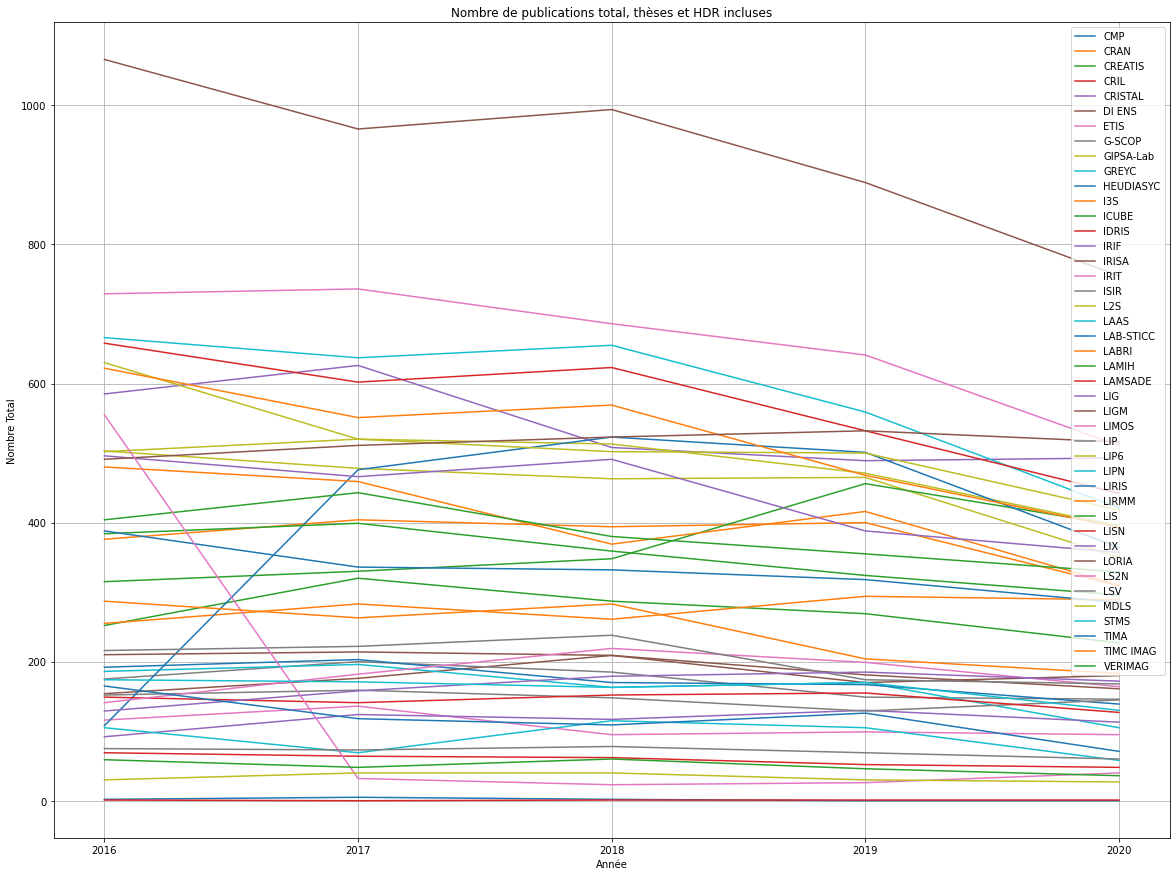

In [157]:
statsParAnneeLabo.groupby('Nom')['Total'].plot(title='Nombre de publications total, thèses et HDR incluses',figsize=(20,15))
plt.xticks(np.arange(2016,2021,step=1))
plt.ylabel("Nombre Total")
plt.legend()
plt.grid(True)

In [158]:
statsParAnneeLabo

,Nom,Total,COMM,ART,COUV,DOUV,OUV,THESE,HDR
Année,,,,,,,,,
2016,CMP,2,1,1,0,0,0,0,0
2017,CMP,5,2,3,0,0,0,0,0
2018,CMP,2,2,0,0,0,0,0,0
2019,CMP,0,0,0,0,0,0,0,0
2020,CMP,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
2016,VERIMAG,59,36,12,3,0,0,7,1
2017,VERIMAG,48,26,10,0,1,0,11,0
2018,VERIMAG,60,32,13,2,1,2,10,0


In [159]:
statsPourPivot = statsParAnneeLabo.reset_index(inplace=False)
ins2i = statsPourPivot.pivot(index="Nom", columns=["Année"], values='Total')
display(ins2i)

Année,2016,2017,2018,2019,2020
Nom,,,,,
CMP,2,5,2,0,0
CRAN,376,404,394,400,309
CREATIS,252,320,287,269,227
CRIL,69,64,62,52,48
CRISTAL,585,626,508,489,493
DI ENS,154,176,209,170,180
ETIS,116,136,95,99,95
G-SCOP,175,200,185,149,146
GIPSA-Lab,503,478,463,465,350


In [160]:
statsParAnneeLabo.groupby('Année').describe()

Total                                                            COMM  \
      count        mean         std  min    25%    50%    75%     max count   
Année                                                                         
2016   43.0  310.325581  238.440241  1.0  135.0  216.0  493.5  1066.0  43.0   
2017   43.0  303.651163  223.381681  0.0  138.5  222.0  471.0   966.0  43.0   
2018   43.0  297.674419  220.411166  1.0  132.5  238.0  477.0   994.0  43.0   
2019   43.0  279.162791  202.897221  0.0  129.5  199.0  460.5   889.0  43.0   
2020   43.0  237.790698  171.254275  0.0  109.0  180.0  360.5   755.0  43.0   

                   ... THESE         HDR                                     \
             mean  ...   75%   max count      mean       std  min  25%  50%   
Année              ...                                                        
2016   171.162791  ...  29.0  75.0  43.0  1.627907  1.964243  0.0  0.0  1.0   
2017   163.069767  ...  33.0  88.0  43.0  1.116279  1.219080  0.0  0.0  1.0   
2018   155.953488  ...  30.5  77.0  43.0  1.372093  1.773123  0.0  0.0  1.0   
2019   143.418605  ...  31.5  78.0  43.0  1.534884  2.015994  0.0  0.0  1.0   
2020   106.116279  ...  27.5  71.0  43.0  1.000000  1.558387  0.0  0.0  0.0   

                 
       75%  max  
Année            
2016   2.0  7.0  
2017   2.0  5.0  
2018   2.0  7.0  
2019   2.5  9.0  
2020   1.0  7.0  

[5 rows x 64 columns]

In [161]:
statsParAnneeLabo.groupby('Nom')['ART'].sum()

Nom
CMP             4
CRAN          732
CREATIS       677
CRIL           46
CRISTAL       903
DI ENS        219
ETIS          184
G-SCOP        284
GIPSA-Lab     851
GREYC         268
HEUDIASYC     278
I3S           428
ICUBE         948
IDRIS           2
IRIF          246
IRISA        1295
IRIT          864
ISIR          351
L2S           958
LAAS         1086
LAB-STICC     600
LABRI         688
LAMIH         719
LAMSADE       302
LIG           469
LIGM          379
LIMOS         361
LIP           366
LIP6          691
LIPN          166
LIRIS         531
LIRMM         987
LIS           731
LISN          891
LIX           324
LORIA         716
LS2N          254
LSV           100
MDLS          117
STMS          243
TIMA          121
TIMC IMAG     929
VERIMAG        53
Name: ART, dtype: int64

In [162]:
ins2i = statsParAnneeLabo.groupby('Année').sum()
display(ins2i)

,Total,COMM,ART,COUV,DOUV,OUV,THESE,HDR
Année,,,,,,,,
2016,13344,7360,4273,434,231,67,909,70
2017,13057,7012,4302,390,219,93,993,48
2018,12800,6706,4385,453,191,90,916,59
2019,12004,6167,4181,477,178,85,850,66
2020,10225,4563,4221,452,143,84,719,43


Text(0, 0.5, 'Nombre total')

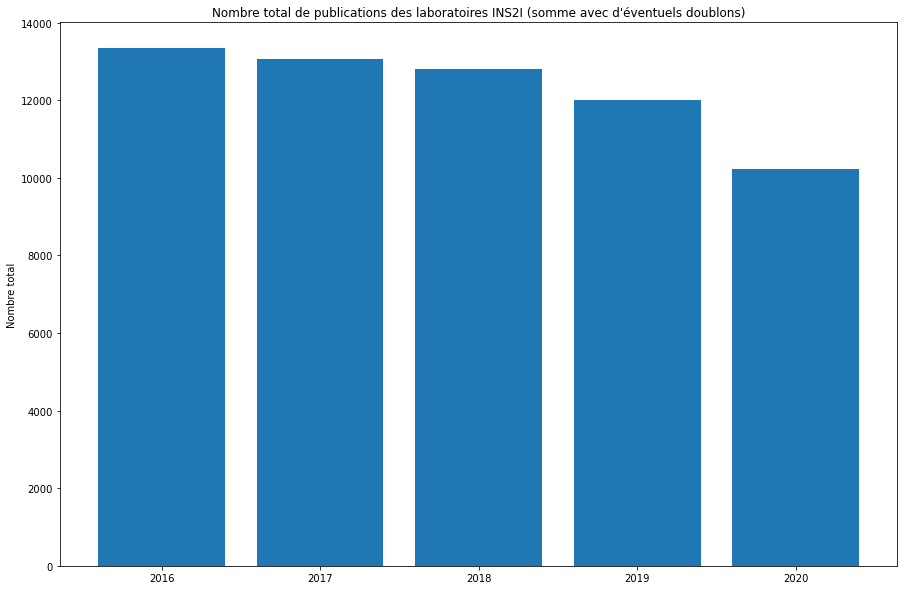

In [163]:
plt.figure(figsize=(15,10))
plt.bar(ins2i.index,ins2i['Total'])
plt.title("Nombre total de publications des laboratoires INS2I (somme avec d'éventuels doublons)")
plt.xticks(np.arange(2016,2021,step=1))
plt.ylabel("Nombre total")

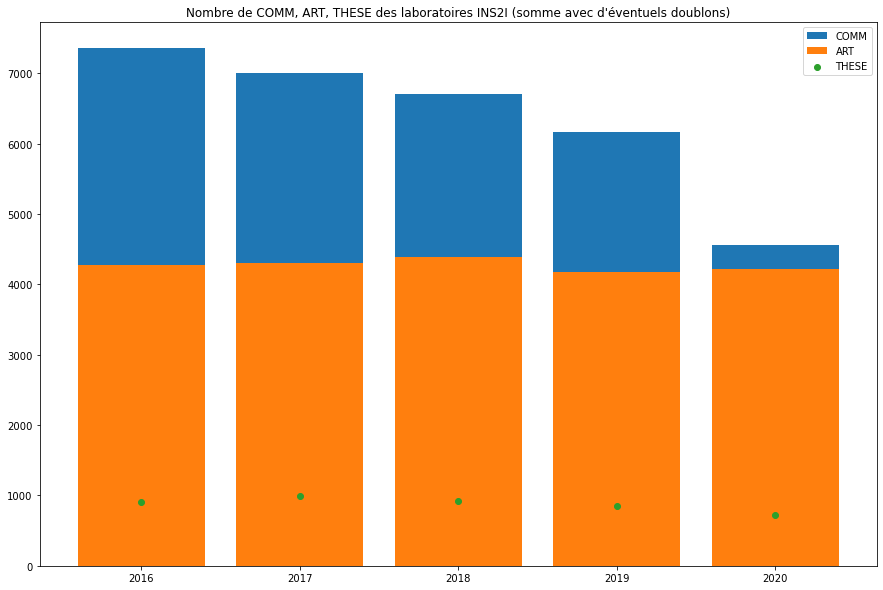

In [164]:
plt.figure(figsize=(15,10))
plt.title("Nombre de COMM, ART, THESE des laboratoires INS2I (somme avec d'éventuels doublons)")
b1 = plt.bar(ins2i.index,ins2i['COMM'])
b2 = plt.bar(ins2i.index,ins2i['ART'])
b3 = plt.scatter(ins2i.index,ins2i['THESE'])
plt.legend([b1,b2,b3], ['COMM','ART','THESE'])

In [9]:
recherche = 'authFullName_t:Patrice+Bellot&sort=publicationDate_s desc&indent=true&rows=10&fl=label_s,keyword_s&facet=true&facet.field=keyword_s&wt=json'

In [10]:
reponses = requests.get("https://api.archives-ouvertes.fr/search/?q="+recherche)

In [11]:
j = json.loads(reponses.text)
print("Nombre documents trouvés : ",j['response']['numFound'])

Nombre documents trouvés :  145


In [115]:
print(reponses.text)

{
  "response":{"numFound":145,"start":0,"docs":[
      {
        "label_s":"Liana Ermakova, Patrice Bellot, Jaap Kamps, Diana Nurbakova, Irina Ovchinnikova, et al.. Automatic Simplification of Scientific Texts: SimpleText Lab at CLEF-2022. Advances in Information Retrieval, 13186, Springer International Publishing, pp.364-373, 2022, Lecture Notes in Computer Science, &#x27E8;10.1007/978-3-030-99739-7_46&#x27E9;. &#x27E8;hal-03637775&#x27E9;"},
      {
        "label_s":"Haytame Fallah, Patrice Bellot, Emmanuel Bruno, Elisabeth Murisasco. Architectures Transformeurs pour la classification multilabels de textes. BDA 2021 - 37ème Conférence sur la Gestion de Données – Principes, Technologies et Applications, Oct 2021, Paris, France. &#x27E8;hal-03489418&#x27E9;",
        "keyword_s":["Deep learning",
          "Transformers",
          "Language models",
          "Multilabel text classification",
          "BERT",
          "Deep Learning",
          "Apprentissage profond",
          "

-------------------------------------

In [12]:
recherche = "labStructAcronym_s:LIRIS&rows=10&fq=producedDateY_i:[2016 TO 2021]&wt=json"

In [13]:
reponses = requests.get("https://api.archives-ouvertes.fr/search/CNRS/?q="+recherche)

In [14]:
print(json.dumps(json.loads(reponses.text), indent=3))

{
   "response": {
      "numFound": 2181,
      "start": 0,
      "docs": [
         {
            "docid": 1878010,
            "label_s": "Abir Masmoudi, Mahmoud Barhamgi, Noura Faci, Zohra Saoud, Khalid Belhajjame, et al.. An Ontology-Based Approach for Mining Radicalization Indicators from Online Messages. 2018 IEEE 32nd International Conference on Advanced Information Networking and Applications (AINA), May 2018, Krakow, Poland. pp.609-616, &#x27E8;10.1109/AINA.2018.00094&#x27E9;. &#x27E8;hal-01878010&#x27E9;",
            "uri_s": "https://hal.archives-ouvertes.fr/hal-01878010"
         },
         {
            "docid": 3390102,
            "label_s": "Alexandre Millot. Exceptional Model Mining meets Multi-Objective Optimization: Application to Plant Growth Recipes in Controlled Environments. Computer Science [cs]. INSA Lyon, 2021. English. &#x27E8;tel-03390102&#x27E9;",
            "uri_s": "https://hal.archives-ouvertes.fr/tel-03390102"
         },
         {
            "doc

## La liste des auteurs du LIRIS entre 2016 et 2020

In [62]:
lanceRequete("CNRS","labStructAcronym_s:LIRIS*&fq=producedDateY_i:[2016%20TO%202020]&rows=0&&facet=true&facet.field=structHasAuthId_fs&facet.prefix=2003_FacetSep_")

{
  "response": {
    "numFound": 1871,
    "start": 0,
    "docs": []
  },
  "facet_counts": {
    "facet_queries": {},
    "facet_fields": {
      "structHasAuthId_fs": [
        "2003_FacetSep_Laboratoire d'InfoRmatique en Image et Syst\u00e8mes d'information_JoinSep_674908_FacetSep_Djamal Benslimane",
        46,
        "2003_FacetSep_Laboratoire d'InfoRmatique en Image et Syst\u00e8mes d'information_JoinSep_307062_FacetSep_Christian Wolf",
        43,
        "2003_FacetSep_Laboratoire d'InfoRmatique en Image et Syst\u00e8mes d'information_JoinSep_757194_FacetSep_Samir Aknine",
        37,
        "2003_FacetSep_Laboratoire d'InfoRmatique en Image et Syst\u00e8mes d'information_JoinSep_46964_FacetSep_Guillaume Beslon",
        36,
        "2003_FacetSep_Laboratoire d'InfoRmatique en Image et Syst\u00e8mes d'information_JoinSep_1668775_FacetSep_Eric Tannier",
        32,
        "2003_FacetSep_Laboratoire d'InfoRmatique en Image et Syst\u00e8mes d'information_JoinSep_212248_FacetSep_David Coeurjolly",
        32,
        "2003_FacetSep_Laboratoire d'InfoRmatique en Image et Syst\u00e8mes d'information_JoinSep_1247523_FacetSep_Parisa Ghodous",
        30,
        "2003_FacetSep_Laboratoire d'InfoRmatique en Image et Syst\u00e8mes d'information_JoinSep_1224140_FacetSep_Noura Faci",
        29,
        "2003_FacetSep_Laboratoire d'InfoRmatique en Image et Syst\u00e8mes d'information_JoinSep_1200816_FacetSep_Angela Bonifati",
        28,
        "2003_FacetSep_Laboratoire d'InfoRmatique en Image et Syst\u00e8mes d'information_JoinSep_693447_FacetSep_Mahmoud Barhamgi",
        28,
        "2003_FacetSep_Laboratoire d'InfoRmatique en Image et Syst\u00e8mes d'information_JoinSep_1108819_FacetSep_Sonia Ben Mokhtar",
        27,
        "2003_FacetSep_Laboratoire d'InfoRmatique en Image et Syst\u00e8mes d'information_JoinSep_1011685_FacetSep_Stefan Duffner",
        26,
        "2003_FacetSep_Laboratoire d'InfoRmatique en Image et Syst\u00e8mes d'information_JoinSep_184772_FacetSep_Christine Solnon",
        26,
        "2003_FacetSep_Laboratoire d'InfoRmatique en Image et Syst\u00e8mes d'information_JoinSep_1113630_FacetSep_Mehdi Kaytoue",
        25,
        "2003_FacetSep_Laboratoire d'InfoRmatique en Image et Syst\u00e8mes d'information_JoinSep_314872_FacetSep_C\u00e9line Robardet",
        25,
        "2003_FacetSep_Laboratoire d'InfoRmatique en Image et Syst\u00e8mes d'information_JoinSep_374940_FacetSep_Youakim Badr",
        24,
        "2003_FacetSep_Laboratoire d'InfoRmatique en Image et Syst\u00e8mes d'information_JoinSep_855381_FacetSep_Liming Chen",
        24,
        "2003_FacetSep_Laboratoire d'InfoRmatique en Image et Syst\u00e8mes d'information_JoinSep_222208_FacetSep_Laure Tougne",
        23,
        "2003_FacetSep_Laboratoire d'InfoRmatique en Image et Syst\u00e8mes d'information_JoinSep_298519_FacetSep_Christophe Garcia",
        23,
        "2003_FacetSep_Laboratoire d'InfoRmatique en Image et Syst\u00e8mes d'information_JoinSep_620262_FacetSep_Chirine Ghedira",
        23,
        "2003_FacetSep_Laboratoire d'InfoRmatique en Image et Syst\u00e8mes d'information_JoinSep_795840_FacetSep_Sara Bouchenak",
        23,
        "2003_FacetSep_Laboratoire d'InfoRmatique en Image et Syst\u00e8mes d'information_JoinSep_1164964_FacetSep_Elise Lavou\u00e9",
        21,
        "2003_FacetSep_Laboratoire d'InfoRmatique en Image et Syst\u00e8mes d'information_JoinSep_167613_FacetSep_Sylvie Servigne",
        21,
        "2003_FacetSep_Laboratoire d'InfoRmatique en Image et Syst\u00e8mes d'information_JoinSep_195084_FacetSep_La\u00ebtitia Matignon",
        21,
        "2003_FacetSep_Laboratoire d'InfoRmatique en Image et Syst\u00e8mes d'information_JoinSep_206969_FacetSep_Hamamache Kheddouci",
        21,
        "2003_FacetSep_Laboratoire d'InfoRmatique en Image et Syst\u00e8mes d'information_JoinSep_439784_FacetSep_Christophe Rigotti",
        21,
        "2003_FacetSep_Laboratoire d'InfoRmatique en Image et Syst\u00e8

In [63]:
lanceRequete("CNRS","labStructAcronym_s:LIRIS*&fq=producedDateY_i:[2016%20TO%202020]&facet=true&facet.pivot=submitType_s,authIdHasPrimaryStructure_fs&rows=0&wt=json")

{
  "response": {
    "numFound": 1871,
    "start": 0,
    "docs": []
  },
  "facet_counts": {
    "facet_queries": {},
    "facet_fields": {},
    "facet_ranges": {},
    "facet_intervals": {},
    "facet_heatmaps": {},
    "facet_pivot": {
      "submitType_s,authIdHasPrimaryStructure_fs": [
        {
          "field": "submitType_s",
          "value": "file",
          "count": 1083,
          "pivot": [
            {
              "field": "authIdHasPrimaryStructure_fs",
              "value": "46964_FacetSep_Guillaume Beslon_JoinSep_160051_FacetSep_Artificial Evolution and Computational Biology",
              "count": 32
            },
            {
              "field": "authIdHasPrimaryStructure_fs",
              "value": "46964_FacetSep_Guillaume Beslon_JoinSep_2003_FacetSep_Laboratoire d'InfoRmatique en Image et Syst\u00e8mes d'information",
              "count": 30
            },
            {
              "field": "authIdHasPrimaryStructure_fs",
              "value": "1108819_FacetSep_Sonia Ben Mokhtar_JoinSep_394737_FacetSep_Distribution, Recherche d'Information et Mobilit\u00e9",
              "count": 24
            },
            {
              "field": "authIdHasPrimaryStructure_fs",
              "value": "1113630_FacetSep_Mehdi Kaytoue_JoinSep_413086_FacetSep_Data Mining and Machine Learning",
              "count": 24
            },
            {
              "field": "authIdHasPrimaryStructure_fs",
              "value": "1668775_FacetSep_Eric Tannier_JoinSep_160051_FacetSep_Artificial Evolution and Computational Biology",
              "count": 24
            },
            {
              "field": "authIdHasPrimaryStructure_fs",
              "value": "1011685_FacetSep_Stefan Duffner_JoinSep_403930_FacetSep_Extraction de Caract\u00e9ristiques et Identification",
              "count": 23
            },
            {
              "field": "authIdHasPrimaryStructure_fs",
              "value": "307062_FacetSep_Christian Wolf_JoinSep_403930_FacetSep_Extraction de Caract\u00e9ristiques et Identification",
              "count": 23
            },
            {
              "field": "authIdHasPrimaryStructure_fs",
              "value": "184772_FacetSep_Christine Solnon_JoinSep_391965_FacetSep_Geometry Processing and Constrained Optimization",
              "count": 22
            },
            {
              "field": "authIdHasPrimaryStructure_fs",
              "value": "1247523_FacetSep_Parisa Ghodous_JoinSep_393309_FacetSep_Service Oriented Computing",
              "count": 18
            },
            {
              "field": "authIdHasPrimaryStructure_fs",
              "value": "212248_FacetSep_David Coeurjolly_JoinSep_391965_FacetSep_Geometry Processing and Constrained Optimization",
              "count": 18
            },
            {
              "field": "authIdHasPrimaryStructure_fs",
              "value": "1164964_FacetSep_Elise Lavou\u00e9_JoinSep_413091_FacetSep_Situated Interaction, Collaboration, Adaptation and Learning",
              "count": 17
            },
            {
              "field": "authIdHasPrimaryStructure_fs",
              "value": "531974_FacetSep_Marc Plantevit_JoinSep_413086_FacetSep_Data Mining and Machine Learning",
              "count": 17
            },
            {
              "field": "authIdHasPrimaryStructure_fs",
              "value": "908599_FacetSep_Aur\u00e9lien Tabard_JoinSep_413091_FacetSep_Situated Interaction, Collaboration, Adaptation and Learning",
              "count": 17
            },
            {
              "field": "authIdHasPrimaryStructure_fs",
              "value": "167613_FacetSep_Sylvie Servigne_JoinSep_401125_FacetSep_Base de Donn\u00e9es",
              "count": 16
            },
            {
              "field": "authIdHasPrimaryStructure_fs",
              "value": "1170678_FacetSep_St\u00e9phane Derrode_JoinSep_403930_FacetSep_Extraction de Caract\u00e9ristiques et Identification",
              "count":